# Clustering analysis

1. Small cdd vs Large cdd analysis
2. Small vs high no. of clusters analysis
3. Choosing hyperparameters

In [1]:
import pandas as pd
import os
import umap
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\sri.sai.praveen.gadi\.virtualenvs\xxx-eAHl9Gue\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
plt.rcParams.update({'font.size': 13})


In [2]:
col_names = ['cp_threshold', 'umap_dim', 'min_cluster_size', 'min_samples', 'max_clusters_cnt', 'min_clusters_cnt', 'mean_clusters_cnt', 'mean_sil_score', 'mean_targeted_document_ratio', 'mean_missed_docs']
target_cols = ['max_clusters_cnt', 'min_clusters_cnt', 'mean_clusters_cnt', 'mean_sil_score', 'mean_targeted_document_ratio', 'harmonic_mean', 'mean_missed_docs']

# smallcdd_filename = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_small_cdd/map_results_hdbscan_1_small_cdd_12022023.csv'
# largecdd_filename = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_large_cdd/map_results_hdbscan_1_large_cdd_12022023.csv'

smallcdd_filename = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_small_cdd/map_results_hdbscan_1_small_cdd.csv'
largecdd_filename = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_large_cdd/map_results_hdbscan_1_large_cdd.csv'

In [51]:
def read_csv_data(filename):
    
    cluster_output_df = pd.read_csv(filename, header=None)
    cluster_output_df.columns= col_names
    
    return cluster_output_df 

def plot_seaborn(df, col_name_1, col_name_2, x_label, y_label, filename, color):
    
    sns.set_palette("pastel")
    sns.set_style("darkgrid", {'axes.grid' : True})

    ax = sns.lineplot(data=df, x=col_name_1, y=col_name_2, color=color)
    
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.savefig('clustering_results/'+filename+'.png', bbox_inches='tight')
    plt.show()
    
def plot_seaborn_subplots(df1, df2, figure_title, col_name_1, col_name_2, x_label, y_label, filename, color1, color2):
    
    sns.set_palette("pastel")
    sns.set_style("darkgrid", {'axes.grid' : True})

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle(figure_title)
    axes[0].set_title('Candidate pool - 30')
    axes[1].set_title('Candidate pool - 100')
    
    axes[0].set(xlabel=x_label, ylabel=y_label)
    axes[1].set(xlabel=x_label, ylabel=y_label)
    
    sns.lineplot(ax=axes[0], data=df1, x=col_name_1, y=col_name_2, color=color1)
    sns.lineplot(ax=axes[1], data=df2, x=col_name_1, y=col_name_2, color=color2)

    plt.savefig('clustering_results/subplots/'+filename+'.png', bbox_inches='tight')
    plt.show()
    
def harmonic_mean(a, b):
    return round((2*a*b)/(a+b), 3)

In [4]:
smallcdd_df = read_csv_data(smallcdd_filename)
largecdd_df = read_csv_data(largecdd_filename)

In [5]:
len(smallcdd_df.index)

1009

In [6]:
len(largecdd_df.index)

1588

# 1. Small cdd vs Large cdd analysis

- Large cdd is always better

- higher mean silhouette score and mean target document ratio
- higher co-relation

In [7]:
scaler = MinMaxScaler() 
smallcdd_df['mean_sil_score_scaled'] = scaler.fit_transform(smallcdd_df[["mean_sil_score"]])
smallcdd_df['mean_targeted_document_ratio_scaled'] = scaler.fit_transform(smallcdd_df[["mean_targeted_document_ratio"]])

largecdd_df['mean_sil_score_scaled'] = scaler.fit_transform(largecdd_df[["mean_sil_score"]])
largecdd_df['mean_targeted_document_ratio_scaled'] = scaler.fit_transform(largecdd_df[["mean_targeted_document_ratio"]])

In [8]:
smallcdd_df['harmonic_mean'] = smallcdd_df.apply(lambda x:harmonic_mean(x['mean_sil_score_scaled'], x['mean_targeted_document_ratio_scaled']), axis=1)
largecdd_df['harmonic_mean'] = largecdd_df.apply(lambda x:harmonic_mean(x['mean_sil_score_scaled'], x['mean_targeted_document_ratio_scaled']), axis=1)

In [9]:
smallcdd_df[target_cols].describe().loc[['mean','max']]

,max_clusters_cnt,min_clusters_cnt,mean_clusters_cnt,mean_sil_score,mean_targeted_document_ratio,harmonic_mean,mean_missed_docs
mean,6.420218,2.132805,4.226543,0.399164,19.158114,0.421667,0.352164
max,16.000000,10.000000,11.824000,0.523000,46.211000,0.896000,1.941000


In [10]:
largecdd_df[target_cols].describe().loc[['mean','max']]

,max_clusters_cnt,min_clusters_cnt,mean_clusters_cnt,mean_sil_score,mean_targeted_document_ratio,harmonic_mean,mean_missed_docs
mean,15.36335,5.298489,10.942778,0.428701,38.254394,0.456069,0.43263
max,46.00000,27.000000,35.176000,0.590000,83.360000,0.964000,2.76500


In [59]:
print(smallcdd_df['mean_sil_score'].corr(smallcdd_df['mean_clusters_cnt']))
print(smallcdd_df['mean_targeted_document_ratio'].corr(smallcdd_df['mean_clusters_cnt']))
print(largecdd_df['mean_sil_score'].corr(largecdd_df['mean_clusters_cnt']))
print(largecdd_df['mean_targeted_document_ratio'].corr(largecdd_df['mean_clusters_cnt']))

0.7092488212745333
0.7605819300474158
0.8869440433964817
0.9377523758830344


In [61]:
print(smallcdd_df['mean_sil_score'].corr(smallcdd_df['mean_clusters_cnt'], method='spearman'))
print(smallcdd_df['mean_targeted_document_ratio'].corr(smallcdd_df['mean_clusters_cnt'], method='spearman'))
print(largecdd_df['mean_sil_score'].corr(largecdd_df['mean_clusters_cnt'], method='spearman'))
print(largecdd_df['mean_targeted_document_ratio'].corr(largecdd_df['mean_clusters_cnt'], method='spearman'))

0.7190574875257548
0.7169076139226227
0.9301688356913694
0.9369633801340593


0.8869440433964817

0.9377523758830344

In [15]:
smallcdd_df['mean_sil_score'].corr(smallcdd_df['mean_targeted_document_ratio'])

0.5746736714412511

In [16]:
largecdd_df['mean_sil_score'].corr(largecdd_df['mean_targeted_document_ratio'])

0.8594479671728893

In [17]:
smallcdd_df['mean_sil_score_scaled'].corr(smallcdd_df['mean_targeted_document_ratio_scaled'])

0.574673671441251

In [18]:
largecdd_df['mean_sil_score_scaled'].corr(largecdd_df['mean_targeted_document_ratio_scaled'])

0.8594479671728891

# 2. Small vs high no. of clusters analysis

- No clear correlation between no. of clusters to silhouette and targeted negative document scores in small and large cdds
- However, a higher cluster count is showing better results 

<br>

- 2.1 Small cdd
- 2.2 Large cdd

## 2. 1 Small cdd

In [19]:
smallcdd_df['mean_clusters_cnt'].corr(smallcdd_df['mean_sil_score'])

0.7092488212745333

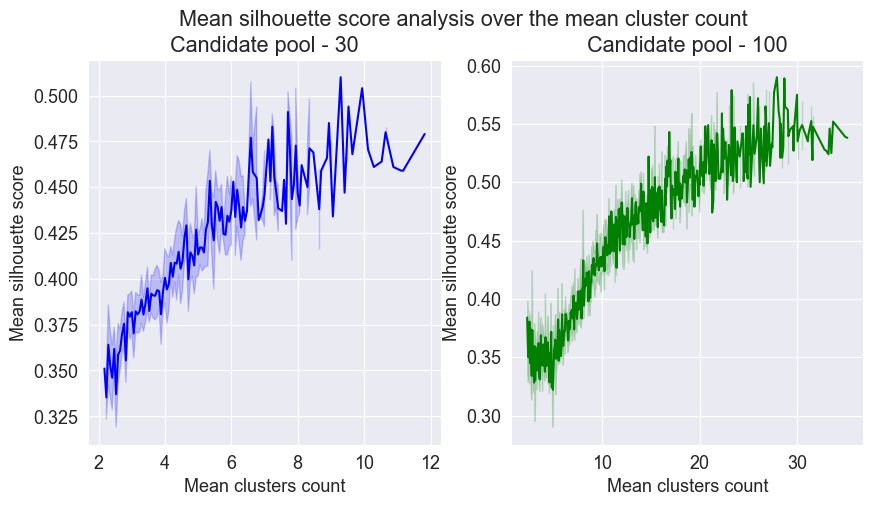

In [52]:
figure_title = 'Mean silhouette score analysis over the mean cluster count'
plot_seaborn_subplots(smallcdd_df, largecdd_df, figure_title, "mean_clusters_cnt", "mean_sil_score", 'Mean clusters count', "Mean silhouette score", 'sil_score_ccnt_subplot', 'blue', 'green')

In [21]:
# plot_seaborn(smallcdd_df, "mean_clusters_cnt", "mean_sil_score", 'Mean clusters count', "Mean silhouette score", 'smallcdd_sil_score', 'blue')

In [22]:
smallcdd_df['mean_clusters_cnt'].corr(smallcdd_df['mean_targeted_document_ratio'])

0.7605819300474157

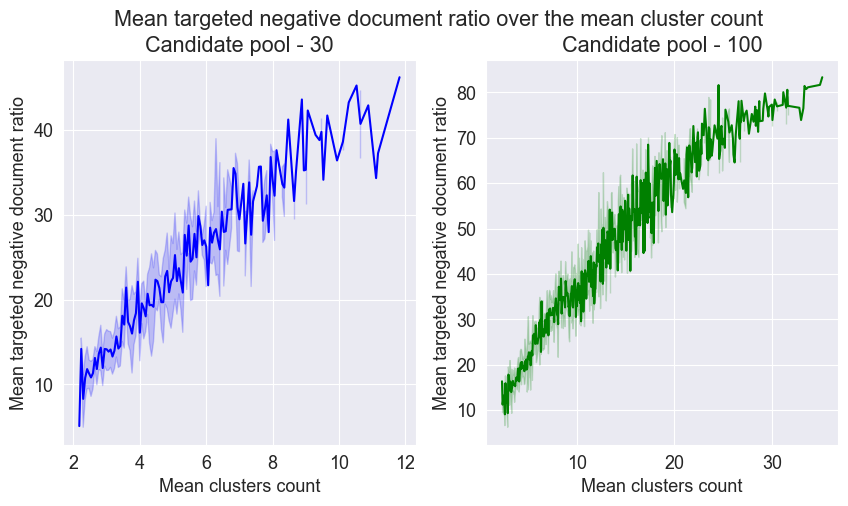

In [53]:
figure_title = 'Mean targeted negative document ratio over the mean cluster count'
plot_seaborn_subplots(smallcdd_df, largecdd_df, figure_title, "mean_clusters_cnt", "mean_targeted_document_ratio", 'Mean clusters count', "Mean targeted negative document ratio", 'targetfn_score_ccnt_subplot', 'blue', 'green')

In [24]:
# plot_seaborn(smallcdd_df,  'blue')

In [25]:
smallcdd_df['cp_threshold'].corr(smallcdd_df['mean_sil_score'])

0.4889701925887839

In [44]:
cp_threshold_group_smallcdd = smallcdd_df.groupby(['cp_threshold'], as_index=False).mean()
cp_threshold_group_largecdd = largecdd_df.groupby(['cp_threshold'], as_index=False).mean()

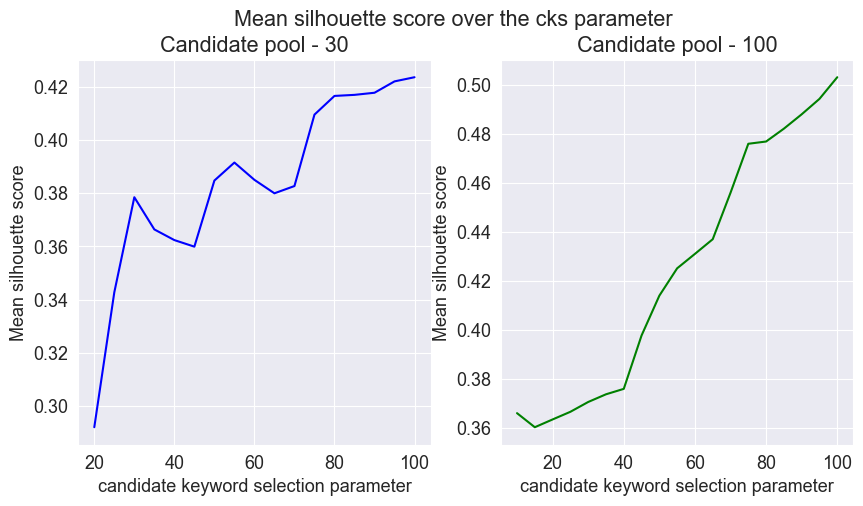

In [54]:
figure_title = 'Mean silhouette score over the cks parameter'
plot_seaborn_subplots(cp_threshold_group_smallcdd, cp_threshold_group_largecdd, figure_title, "cp_threshold", "mean_sil_score", 'candidate keyword selection parameter', "Mean silhouette score", 'csk_sil_score_subplot', 'blue', 'green')

In [ ]:
# plot_seaborn(cp_threshold_group_smallcdd, "cp_threshold", "mean_sil_score", 'Candidate keyword selection parameter', "Mean silhouette score", 'samllcdd_csp_sil_score', 'blue')

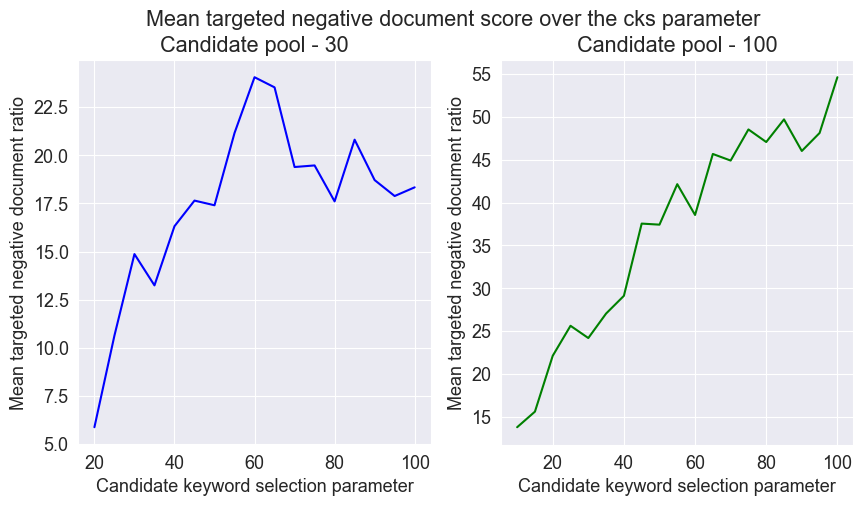

In [55]:
figure_title = 'Mean targeted negative document score over the cks parameter'
plot_seaborn_subplots(cp_threshold_group_smallcdd, cp_threshold_group_largecdd, figure_title, "cp_threshold", "mean_targeted_document_ratio", 'Candidate keyword selection parameter', "Mean targeted negative document ratio", 'csk_tfn_score_subplot','blue', 'green')

In [ ]:
# plot_seaborn(cp_threshold_group_smallcdd, "cp_threshold", "mean_targeted_document_ratio", 'Candidate keyword selection parameter', "Mean targeted negative document ratio", 'smallcdd_csp_tfn_score', 'blue')

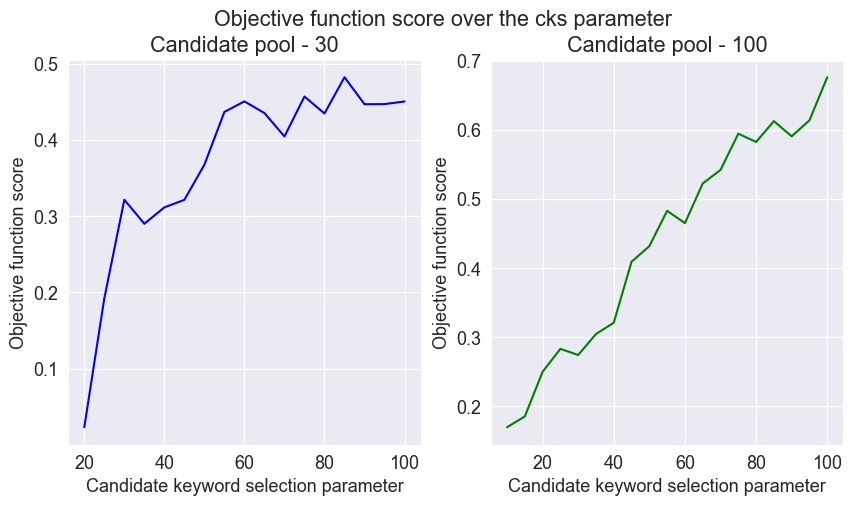

In [56]:
figure_title = 'Objective function score over the cks parameter'
plot_seaborn_subplots(cp_threshold_group_smallcdd, cp_threshold_group_largecdd, figure_title, "cp_threshold", "harmonic_mean", 'Candidate keyword selection parameter', "Objective function score", 'harmonic_score_cks_subplot', 'blue', 'green')

In [ ]:
# plot_seaborn(cp_threshold_group_smallcdd, "cp_threshold", "harmonic_mean", 'Candidate keyword selection parameter', "Harmonic ratio", 'smallcdd_harmonic_score', 'blue')

## 2. 2 Large cdd

In [48]:
largecdd_df['mean_clusters_cnt'].corr(smallcdd_df['mean_sil_score'])

0.29589794560935606

In [ ]:
# plot_seaborn(largecdd_df, "mean_clusters_cnt", "mean_sil_score", 'Mean clusters count', "Mean silhouette score", 'largecdd_sil_score', 'green')

In [49]:
largecdd_df['mean_clusters_cnt'].corr(smallcdd_df['mean_targeted_document_ratio'])

-0.011378099529761373

In [ ]:
# plot_seaborn(largecdd_df, "mean_clusters_cnt", "mean_targeted_document_ratio", 'Mean clusters count', "Mean targeted negative document ratio", 'largecdd_targetfn_score', 'green')

In [50]:
largecdd_df['cp_threshold'].corr(largecdd_df['mean_sil_score'])

0.7526991356657037

In [ ]:
cp_threshold_group_largecdd = largecdd_df.groupby(['cp_threshold'], as_index=False).mean()

In [ ]:
# plot_seaborn(cp_threshold_group_largecdd, "cp_threshold", "mean_sil_score", 'Candidate keyword selection parameter', "Mean silhouette score", 'largecdd_csp_sil_score', 'green')

In [ ]:
# plot_seaborn(cp_threshold_group_largecdd, "cp_threshold", "mean_targeted_document_ratio", 'Candidate keyword selection parameter', "Mean targeted negative document ratio", 'largecdd_csp_tfn_score', 'green')

In [ ]:
# plot_seaborn(cp_threshold_group_largecdd, "cp_threshold", "harmonic_mean", 'Candidate keyword selection parameter', "Harmonic ratio", 'largecdd_harmonic_score', 'green')

# 3. Choosing hyperparameters

1. Candidate keyword selection -- [0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
2. Reduced dimensions (Umap) -- [5, 10]
3. Min cluster size (Hdbscan) -- [20, 25, 30, 35, 40, 45, 50, 55, 60] 
4. Min samples(Hdbscan) -- [1, 3, 5, 7, 10]

<br>

Total combinations: 

1. Small cdd size: 308
2. Large cdd size: 450

In [ ]:
len(smallcdd_df.index)

In [ ]:
len(largecdd_df.index)

In [ ]:
csk = smallcdd_df.cp_threshold.values
harmonic_mean = smallcdd_df.harmonic_mean.values

In [ ]:
def get_csk_groupdf(df):
    
    target_analysis_columns = ['mean_sil_score', 'mean_targeted_document_ratio', 'harmonic_mean']
    small_csk_groupdf = df.groupby(['cp_threshold']).mean()
    small_csk_groupdf = small_csk_groupdf[target_analysis_columns]
    
    small_csk_groupdf = small_csk_groupdf.sort_values(by=['harmonic_mean'], ascending=False).head(5)
    small_csk_groupdf = small_csk_groupdf.reset_index()
    
    small_csk_groupdf['cp_threshold'] = small_csk_groupdf.apply(lambda x: int(x['cp_threshold']), axis=1)
    small_csk_groupdf['mean_sil_score'] = small_csk_groupdf.apply(lambda x: round(x['mean_sil_score'], 2), axis=1)
    small_csk_groupdf['mean_targeted_document_ratio'] = small_csk_groupdf.apply(lambda x: round(x['mean_targeted_document_ratio'], 2), axis=1)
    small_csk_groupdf['harmonic_mean'] = small_csk_groupdf.apply(lambda x: round(x['harmonic_mean'], 2), axis=1)

    return small_csk_groupdf

def get_csk_groupdf_meta(df):
    
    target_analysis_columns = ['mean_missed_docs']
    small_csk_groupdf = df.groupby(['cp_threshold']).mean()

    small_csk_groupdf = small_csk_groupdf[target_analysis_columns]
    small_csk_groupdf = small_csk_groupdf.reset_index()
   
    
    small_csk_groupdf = small_csk_groupdf[small_csk_groupdf['cp_threshold'].isin([20, 40, 60, 80, 100])]
    
    small_csk_groupdf = small_csk_groupdf.sort_values(by=['cp_threshold'], ascending=True).head(50)
    small_csk_groupdf = small_csk_groupdf.reset_index()
    
    small_csk_groupdf['cp_threshold'] = small_csk_groupdf.apply(lambda x: int(x['cp_threshold']), axis=1)
    small_csk_groupdf['mean_clusters_cnt'] = small_csk_groupdf.apply(lambda x: round(x['mean_clusters_cnt'], 2), axis=1)
    small_csk_groupdf['mean_missed_docs'] = small_csk_groupdf.apply(lambda x: round(x['mean_missed_docs'], 2), axis=1)

    return small_csk_groupdf

def get_max_harmonicmean(df):
    
    final_cols = ['cp_threshold', 'umap_dim', 'min_cluster_size', 'min_samples', 'harmonic_mean']
    
    df1 = df.sort_values(by=['harmonic_mean'], ascending=False).head(5)
    df1 = df1[final_cols]
    
    return df1   

In [ ]:
get_csk_groupdf_meta(smallcdd_df)

In [ ]:
get_csk_groupdf_meta(largecdd_df)

In [ ]:
small_csk_groupdf = get_csk_groupdf(smallcdd_df)

print(small_csk_groupdf.to_latex())

In [ ]:
small_csk_groupdf = get_csk_groupdf(largecdd_df)

print(small_csk_groupdf.to_latex())

In [ ]:
smallcdd_df.sort_values(by=['harmonic_mean'], ascending=False).head(50)

In [ ]:
smallcdd_df.sort_values(by=['harmonic_mean'], ascending=False).head(10)

# _best parameters

# 1. Candidate keyword selection -- 0.6
# 2. Reduced dimensions (Umap) -- 5
# 3. Min cluster size (Hdbscan) -- 20
# 4. Min samples(Hdbscan) -- 5

In [ ]:
largecdd_df.sort_values(by=['harmonic_mean'], ascending=False).head(10)

# _best parameters

# 1. Candidate keyword selection -- 0.7
# 2. Reduced dimensions (Umap) -- 10
# 3. Min cluster size (Hdbscan) -- 20
# 4. Min samples(Hdbscan) -- 10

In [ ]:
print(get_max_harmonicmean(smallcdd_df).to_latex(index=False))

In [ ]:
print(get_max_harmonicmean(largecdd_df).to_latex(index=False))

# Query term cluster analysis

In [ ]:
smallcdd_folder = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_small_cdd/'
largecdd_folder = os.getcwd()+'/../dataframes/hdbscan_cluster_dataframes_updated_nc_large_cdd/'

In [ ]:
def get_modified_vectors(vec_data):
    
    new_data = []
    for val in vec_data:
        new_data.append(val)
    
    new_data = np.array(new_data).reshape(-1, 512)
    return new_data

def get_umap_output(vec_array, dim_size=5):
    
    umap_obj = umap.UMAP(n_neighbors=30, 
                        n_components=dim_size, 
                        min_dist=0.01,
                        metric='cosine',
                        random_state=123).fit(vec_array) 
    
    umap_output = umap_obj.transform(vec_array) 
    return umap_output

def project_on_2Dplane(query_df, filename):
    
    topic_names = query_df.topic.values
    data = get_modified_vectors(query_df.mean_vec.values)
    
    umap_output = get_umap_output(data, dim_size=2)
    df = pd.DataFrame(np.column_stack((umap_output, topic_names)), columns=['x', 'y', 'sub_topics'])
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df,x='x',y='y')
    
    for i in range(df.shape[0]):
         plt.text(x=df.x[i]-0.15,y=df.y[i]+0.1,s=df.sub_topics[i], 
                  fontdict=dict(color='green',size=8))
    plt.xlim(df.x.min()-1,df.x.max()+1)                #set x limit
    plt.ylim(df.y.min()-1,df.y.max()+1)              #set y limit 
    
    plt.title('Sub-topic (cluster centroids) plot') #title
    plt.xlabel('Dimension 1') #x label
    plt.ylabel('Dimension 2') #y label

    plt.savefig('clustering_results/'+filename+'.png',bbox_inches='tight')
    plt.show()
    
    

In [ ]:
target_names = ['edge_computing_df.pkl']

for query_df_filename in os.listdir(smallcdd_folder):
    if '.pkl' in query_df_filename and query_df_filename in target_names:
        try:
            print(query_df_filename)
            filename = query_df_filename.split('.pkl')[0]
            query_df = pd.read_pickle(smallcdd_folder+query_df_filename)
            project_on_2Dplane(query_df, filename+'_small')
        except:
            continue

In [ ]:
def get_avg_cluster_size(folder_name):
    
    cluster_size_list = []
    totalterms_size_list = []
    num_clusters = []
    
    for query_df_filename in os.listdir(folder_name):
        if '.pkl' in query_df_filename:
            try:
                filename = query_df_filename.split('.pkl')[0]
                
                query_df = pd.read_pickle(folder_name+query_df_filename)
                candidate_list_size = []
                for cd in query_df.candidate_words.values:
                    candidate_list_size.append(len(cd))
                                    
                num_clusters.append(len(query_df.index))
                    
                avg_cluster_size = round(sum(candidate_list_size)/len(candidate_list_size), 3)
                cluster_size_list.append(avg_cluster_size)
                totalterms_size_list.append(sum(candidate_list_size))
                
                print(f'Query_name: {filename}, Average cluster size: {avg_cluster_size}')
                
                cluster_size_list.append(len())
    #             project_on_2Dplane(query_df, filename+'_small')

            except:
                continue
    
    avg_cluster_size_query = round(sum(cluster_size_list)/len(cluster_size_list), 3)
    avg_total_cluster_size_query = round(sum(totalterms_size_list)/len(totalterms_size_list), 3)
    avg_number_of_clusters = round(sum(num_clusters)/len(num_clusters), 3)
    
    print(f'\nAll query average cluster size: {avg_cluster_size_query}')
    print(f'total cluster size: {avg_total_cluster_size_query}')
    print(f'Average Num of clusters: {avg_number_of_clusters}')


In [ ]:
get_avg_cluster_size(smallcdd_folder)

In [ ]:
get_avg_cluster_size(largecdd_folder)